# Vizualization on the regressions

Using data science principles, this notebook is used for a simple overview in the results obtained in the regressions in each model.

![arquitetura_experimento](./assets/arq.png)

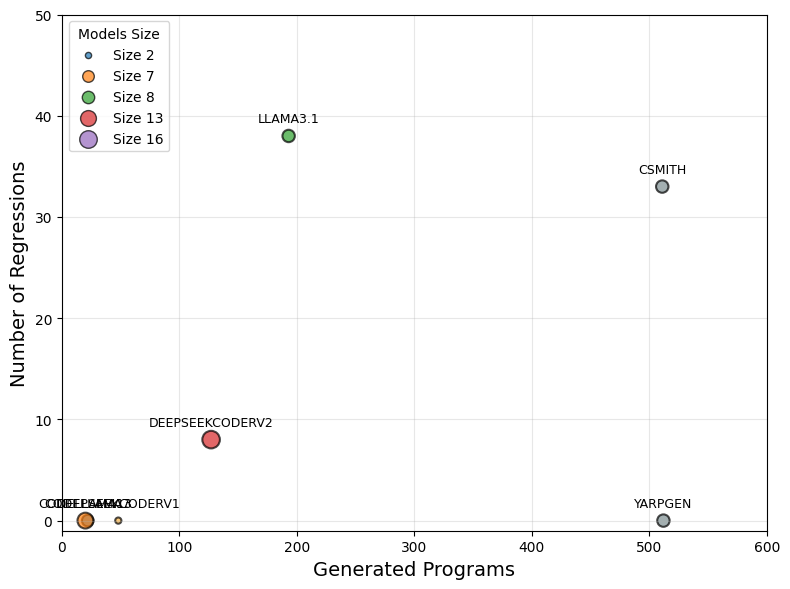

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("../../data/TimeCodeExperiment/compiled_models2.csv")

color =  ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728','#fab342', '#7d8e91', '#7d8e91'] 

plt.figure(figsize=(8, 6))
plt.scatter(
    x=df['total'],
    y=df['regressions'],
    s=df['size']*10, 
    c=color,
    alpha=0.7,
    edgecolors='k',
    linewidth=1.5
)

for i, row in df.iterrows():
    plt.annotate(
        row['model'],
        (row['total'], row['regressions']),
        textcoords="offset points",
        xytext=(0,10),
        ha='center',
        fontsize=9
    )

# Customização do gráfico
# plt.title('Relação entre Programas Gerados e Regressões por Modelo', fontsize=14, pad=20)  // TÍTULO NÃO PRECISA POIS VAI NO CAPTION DO OVERLEAF
plt.xlabel('Generated Programs', fontsize=14)
plt.ylabel('Number of Regressions', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xlim(0, 600)
plt.ylim(-1, 50)

# Legenda de tamanho
sizes = df['size'].unique()
for size in sorted(sizes):
    plt.scatter([], [], s=size*10, label=f'Size {size}', edgecolors='k', alpha=0.7)
plt.legend(title='Models Size', frameon=True, loc='upper left')

plt.tight_layout()
plt.show()

(0.0, 1.2)

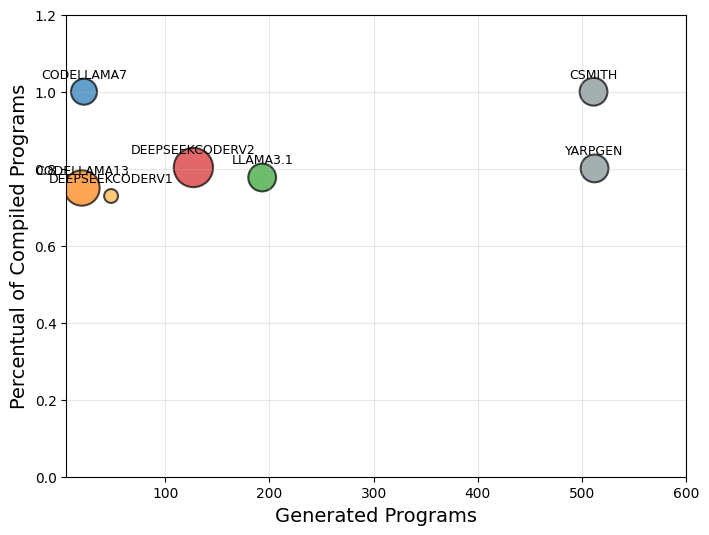

In [3]:


plt.figure(figsize=(8, 6))
plt.scatter(
    x=df['total'],
    y=df['proportion_compiled'],
    s=df['size']*50,
    c=color,
    alpha=0.7,
    edgecolors='k',
    linewidth=1.5
)

for i, row in df.iterrows():
    plt.annotate(
        row['model'],
        (row['total'], row['proportion_compiled']),
        textcoords="offset points",
        xytext=(0,10),
        ha='center',
        fontsize=9
    )

# Customização do gráfico
# plt.title('Relação entre Tempo Total e Regressões por Modelo', fontsize=14, pad=20) // VAI NO CAPTION DO OVERLEAF
plt.xlabel('Generated Programs', fontsize=14)
plt.ylabel('Percentual of Compiled Programs', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xlim(5, 600)
plt.ylim(0, 1.2)


In [16]:
deep1_sec = pd.read_csv("../../data/TimeCodeExperiment/deepseekv2instructed/model_chain_programs.csv")
deep2_sec = pd.read_csv("../../data/TimeCodeExperiment/deepseekv1instructed/model_chain_programs.csv")
llama_sec = pd.read_csv("../../data/TimeCodeExperiment/llama3.1/model_chain_programs.csv")
codel7_sec = pd.read_csv("../../data/TimeCodeExperiment/codellama7/model_chain_programs.csv")
codel13_sec = pd.read_csv("../../data/TimeCodeExperiment/codellama13/model_chain_programs.csv")
models = [deep1_sec,deep2_sec,llama_sec,codel7_sec,codel13_sec]

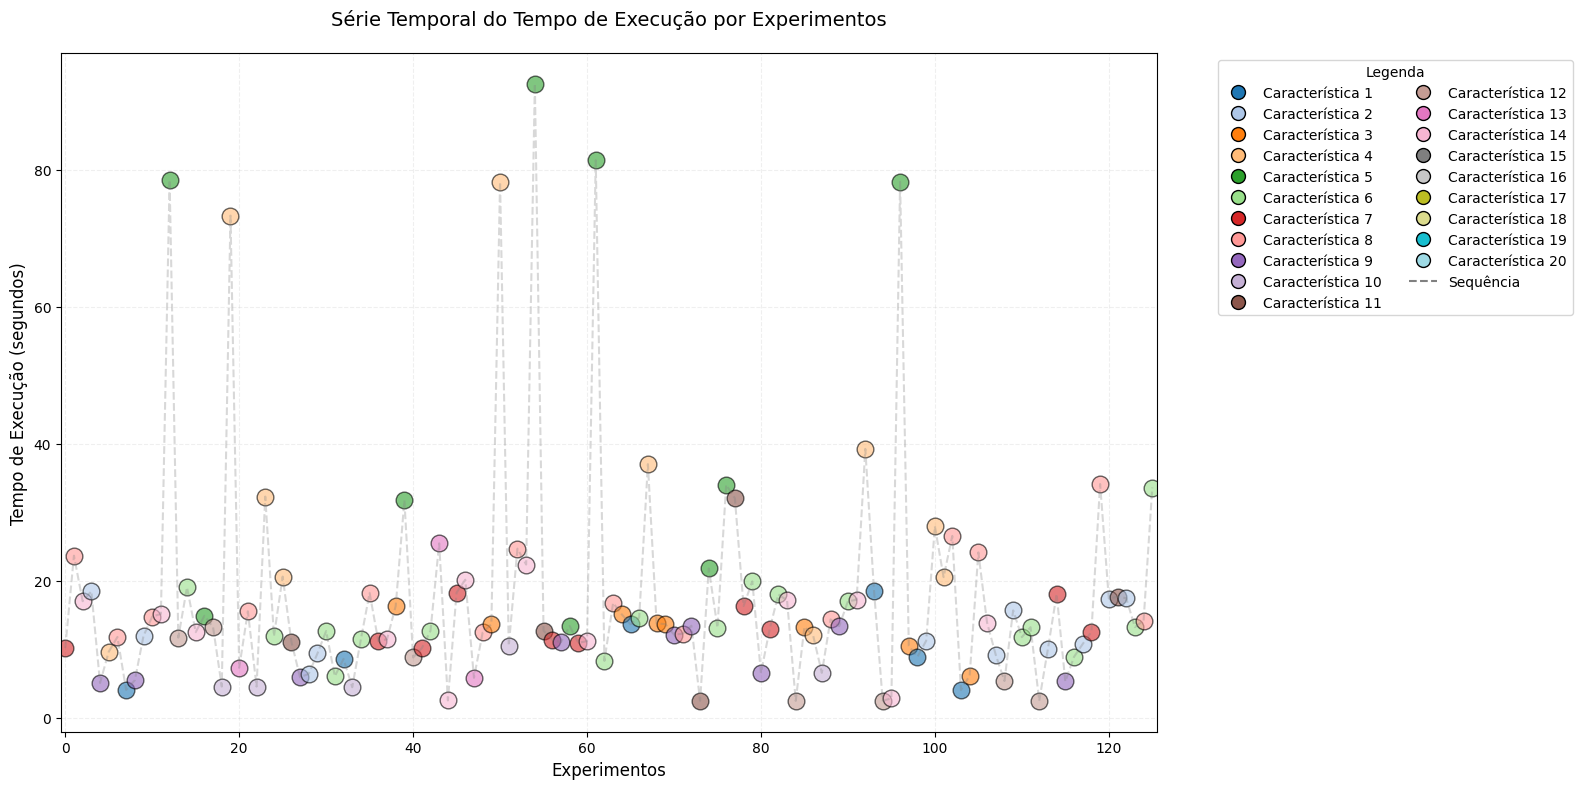

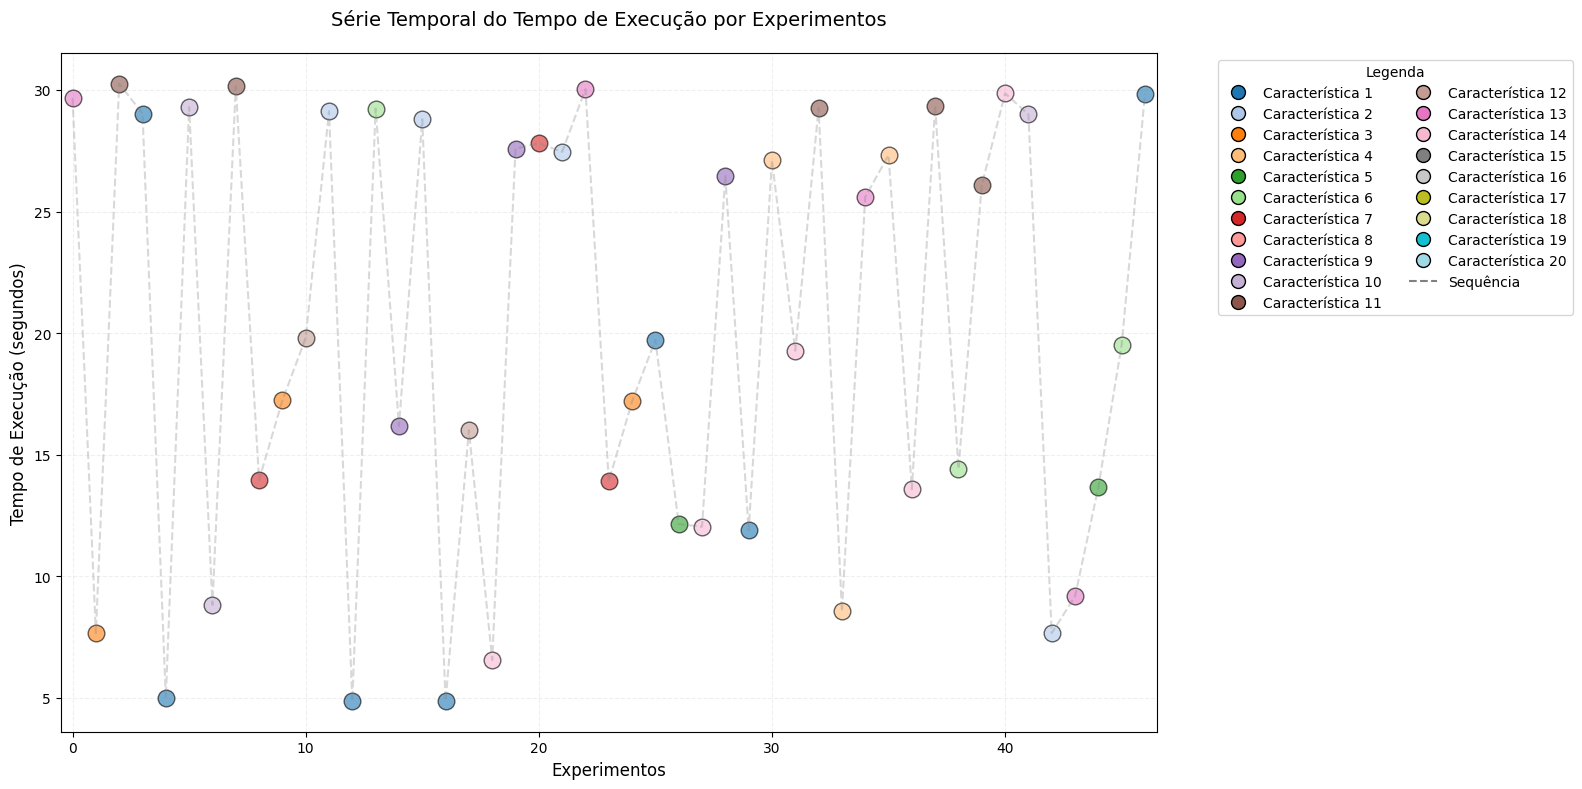

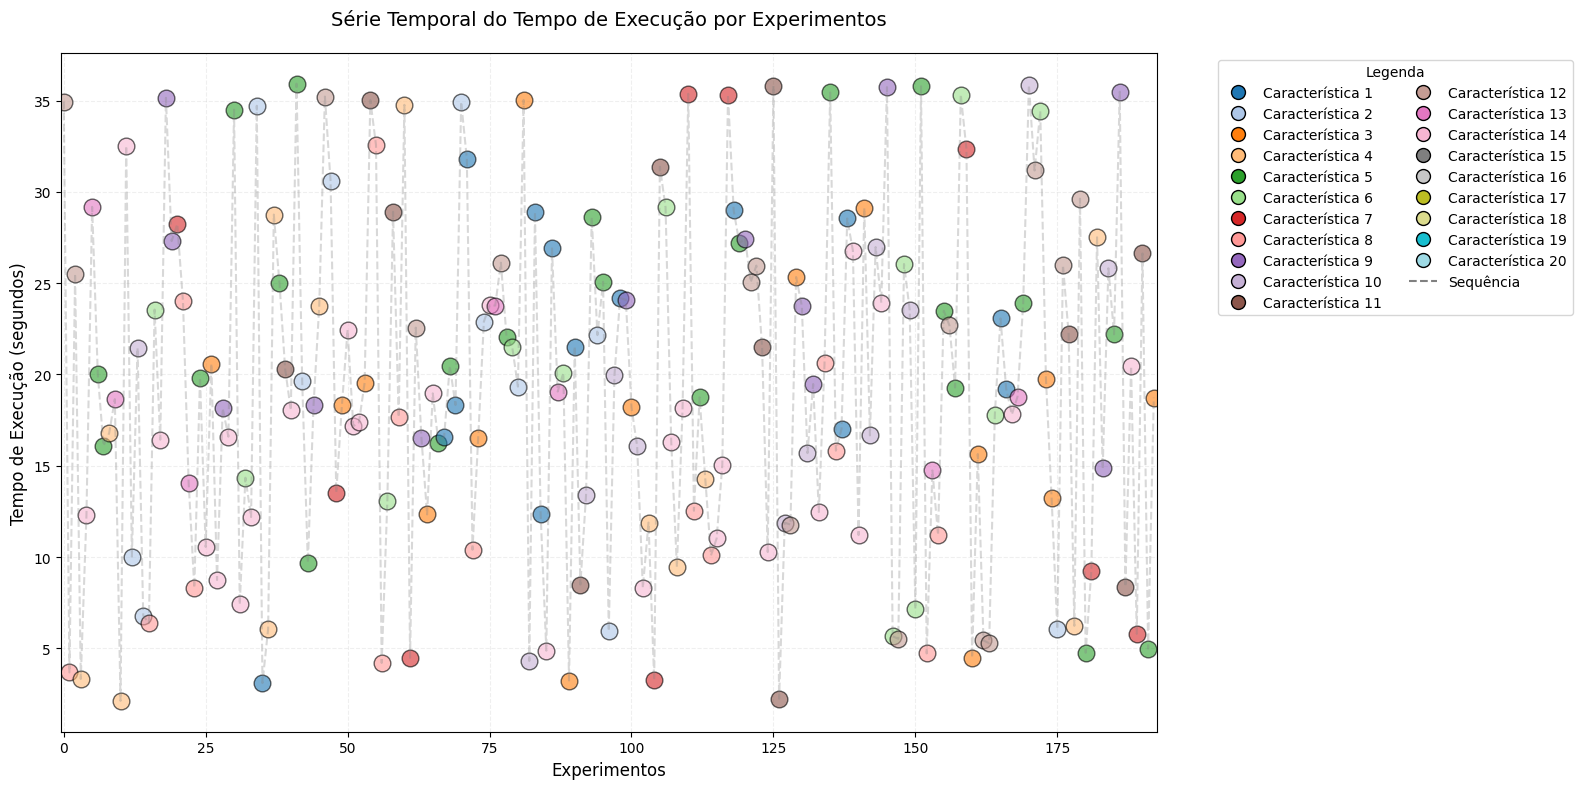

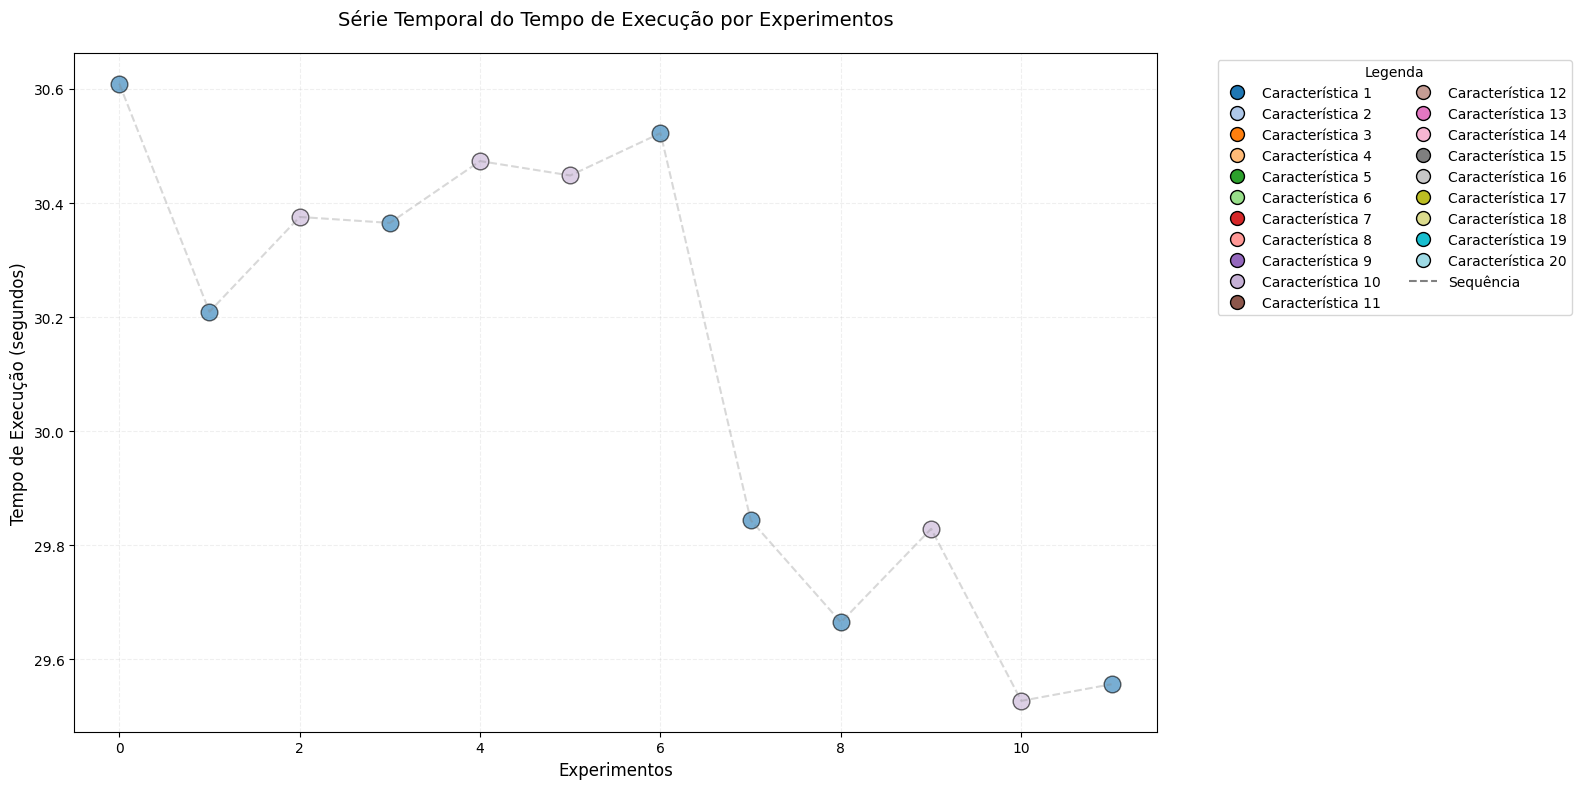

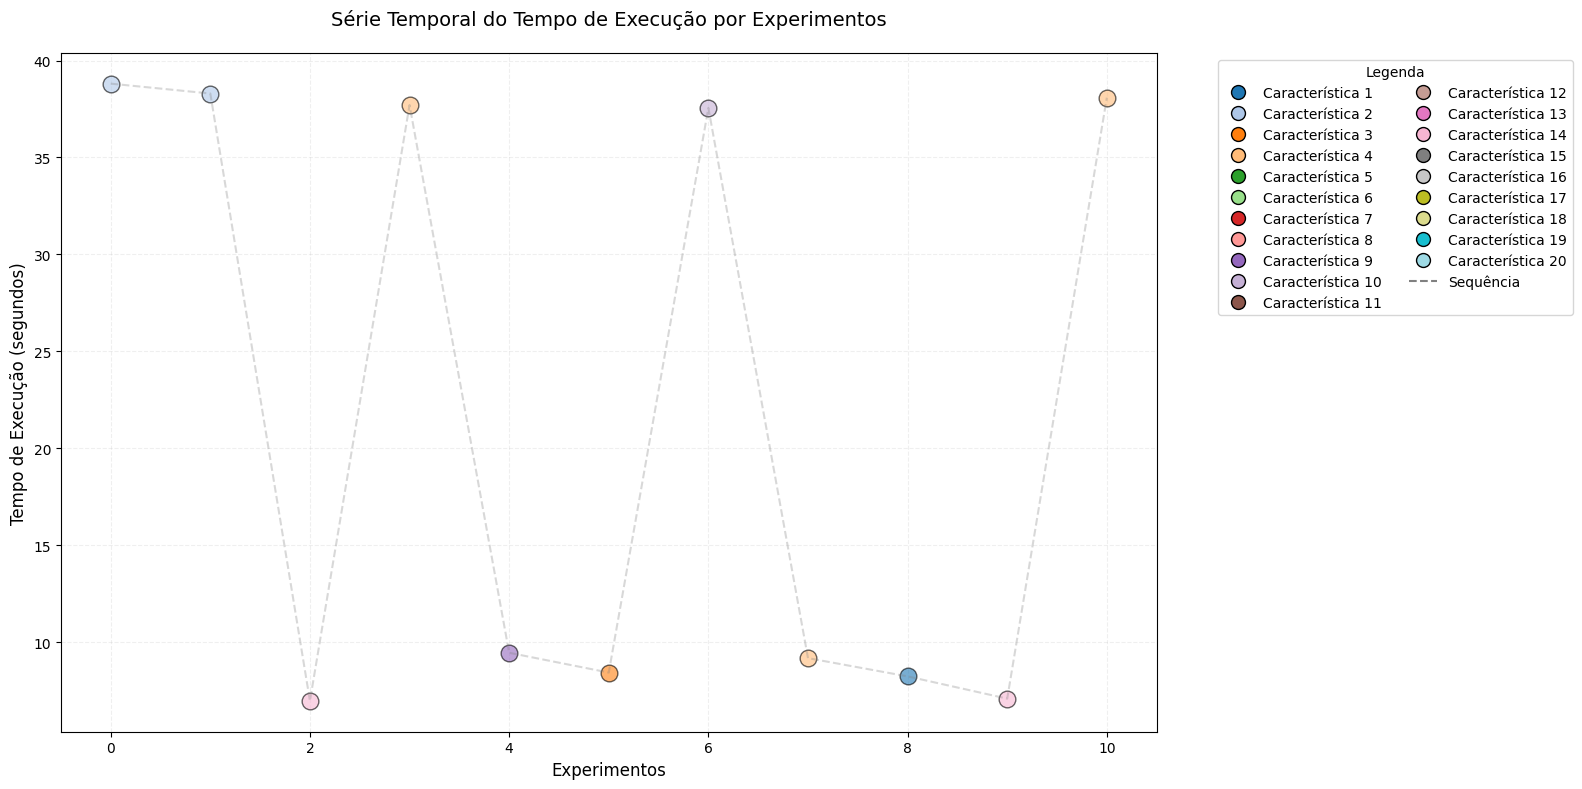

In [21]:

for df in models:
    
    color_map = {
        1:  '#1f77b4',  2:  '#aec7e8',
        3:  '#ff7f0e',  4:  '#ffbb78',
        5:  '#2ca02c',  6:  '#98df8a',
        7:  '#d62728',  8:  '#ff9896',
        9:  '#9467bd', 10:  '#c5b0d5',
        11: '#8c564b', 12: '#c49c94',
        13: '#e377c2', 14: '#f7b6d2',
        15: '#7f7f7f', 16: '#c7c7c7',
        17: '#bcbd22', 18: '#dbdb8d',
        19: '#17becf', 20: '#9edae5'
    }

    plt.figure(figsize=(16, 8))
    ax = plt.gca()

    for idx, row in df.iterrows():
        ax.plot(
            idx, 
            row['seconds'], 
            marker='o',
            markersize=12,
            markerfacecolor=color_map[row['caracteristcs']],  
            markeredgecolor='black',
            linestyle='-',
            color='gray',
            alpha=0.6
        )

    ax.plot(
        df.index, 
        df['seconds'], 
        linestyle='--', 
        color='gray', 
        alpha=0.3,
        label='Sequência temporal'
    )

    ax.set_xlim(-0.5, len(df)-0.5)

    plt.xlabel('Experimentos', fontsize=12)
    plt.ylabel('Tempo de Execução (segundos)', fontsize=12)
    plt.title('Série Temporal do Tempo de Execução por Experimentos', fontsize=14, pad=20)

    plt.grid(True, alpha=0.2, linestyle='--')


    legend_elements = [
        plt.Line2D(
            [0], [0],
            marker='o',
            color='w',
            label=f'Característica {i}',
            markerfacecolor=color_map[i],
            markersize=10,
            markeredgecolor='black'
        ) for i in range(1, 21)  
    ]
    
    legend_elements.append(
        plt.Line2D(
            [0], [0],
            color='gray',
            linestyle='--',
            label='Sequência'
        )
    )

    ax.legend(
        handles=legend_elements,
        bbox_to_anchor=(1.05, 1),
        loc='upper left',
        frameon=True,
        title="Legenda",
        ncol=2 
    )

    plt.tight_layout()
    plt.show()